# 1 Exploratory Data Analysis

# 2 데이터셋 출처
- Pima Indians Diabetes Databasa | Kaggle

## 2.1 데이터 구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 3 라이브러리 로드

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 4 데이터 로드

In [7]:
df = pd.read_csv('file-path/data/diabetes.csv')
df.shape

(768, 9)

In [6]:
# 위에서  5개만 미리보기 합니다.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# info로 데이터타입,결측치,메모리 사용량 등의 정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# 결측치를 봅니다.
df_null = df.isnull()
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# 수치데이터에 대한 요약을 봅니다.
# 0인 값들은 결측치일 확률이 높아보인다.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# 가장 마지막에 있는 Outcome 은 label 값이기 때문에 제외하고
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
# feature_columns 라는 변수에 담아줍니다.
feature_columns = df.columns[:-1].tolist()

# 5 결측치 시각화
- 값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다. 0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것 입니다. 따라서 0인 값을 결측치로 처리하고 시각화 해봅니다.

In [21]:
cols = feature_columns[1:]

In [31]:
# 결측치 여부를 나타내는 데이터프레임을 만듭니다.
# 0값을 결측치라 가정하고 정답(label, targer)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담습니다.
# 인슐린의 결측치가 많은 것을 볼 수 있다.
df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

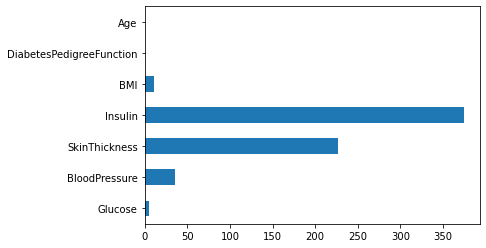

In [32]:
# 결측치 갯수를 구해 막대 그래프로 시각화 합니다.
df_null.sum().plot.barh()

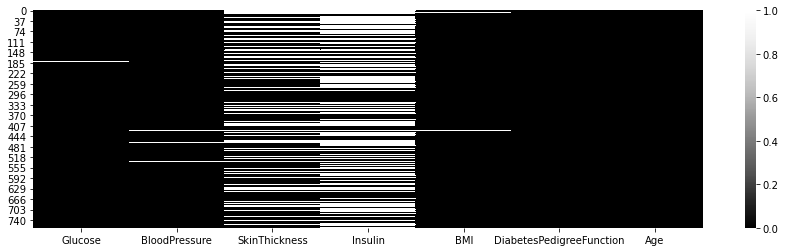

In [36]:
# 결측치를 heatmap으로 시각화 합니다.
plt.figure(figsize=(15,4))
sns.heatmap(df_null,cmap='Greys_r')

# 6 정답값
- targer, label 이라고 부르기도 합니다.

In [38]:
#  정답값인 Outcome 의 개수를 봅니다.
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [40]:
# 정답값인 Outcome의 비율을 봅니다.
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [48]:
# 다른 변수와 함께 봅니다.
# 임신횟수와 정답값을 비교해 봅니다.
#  'Pregnancies'를 groupby로 그룹화해서 Outcome 에 대한 비율을 구합니다.
# 결과를 df_po라는 변수에 저장합니다.

# 임신횟수가 늘수록 당뇨병 발병 확률이 올라가는 것을 볼 수 있다.

df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


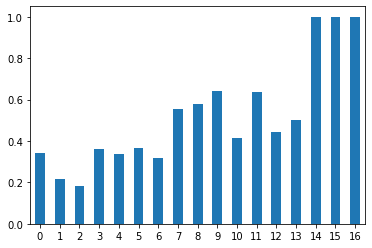

In [54]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot=0)

# 7 countplot

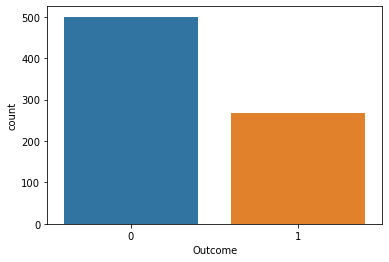

In [58]:
# 위에서 구했던 당뇨병 발병 비율을 구해봅니다.
# 당뇨병 발병 빈도수를 비교합니다.

sns.countplot(data=df, x='Outcome')

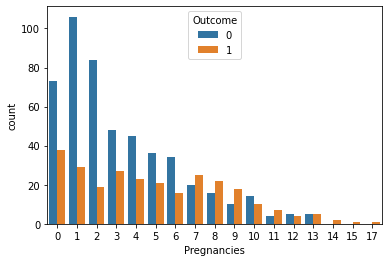

In [60]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교합니다.
sns.countplot(data=df, x='Pregnancies',hue='Outcome')

In [66]:
# 임신 횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듭니다.

df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [ ]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고 
# Outcome 값에 따라 다른 색상으로 표현합니다.

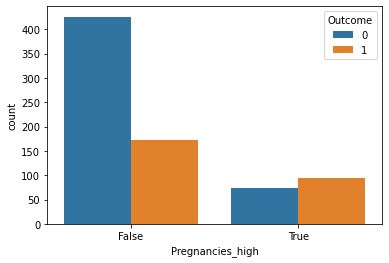

In [67]:
sns.countplot(data=df,x='Pregnancies_high',hue='Outcome')